In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import wave
import librosa
import librosa.display

In [3]:
file_path = os.path.join(os.getcwd(), 'audio', 'Audio1.wav')

In [5]:
with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    n_channels = wav_file.getnchannels()

In [6]:
print(f"Isi dari sound_data: {sound_data}")
print(f"Panjang dari sound_data: {len(sound_data)}")
print(f"Sampling rate: {sampling_rate}")
print(f"Jumlah channel: {n_channels}")

Isi dari sound_data: [  0   0   0 ... 408 368 413]
Panjang dari sound_data: 468992
Sampling rate: 48000
Jumlah channel: 2


In [9]:
sound_data = sound_data.reshape(-1, n_channels)
print(f"Shape dari `sound_data` setelah di reshape: {sound_data.shape}")

data_audio_kiri = sound_data[:, 0]
data_audio_kanan = sound_data[:, 1]

print(f"Panjang Audio Kiri: {len(data_audio_kiri)}")
print(f"Panjang Audio Kanan: {len(data_audio_kanan)}")

Shape dari `sound_data` setelah di reshape: (234496, 2)
Panjang Audio Kiri: 234496
Panjang Audio Kanan: 234496


In [10]:
panjang_audio_sampel = len(data_audio_kiri)
print(f"Panjang Audio Sampel: {panjang_audio_sampel}")

panjang_audio_detik = panjang_audio_sampel / sampling_rate
print(f"Panjang Audio Detik: {panjang_audio_detik}")

time_axis = np.linspace(0, panjang_audio_detik, panjang_audio_sampel)

Panjang Audio Sampel: 234496
Panjang Audio Detik: 4.8853333333333335


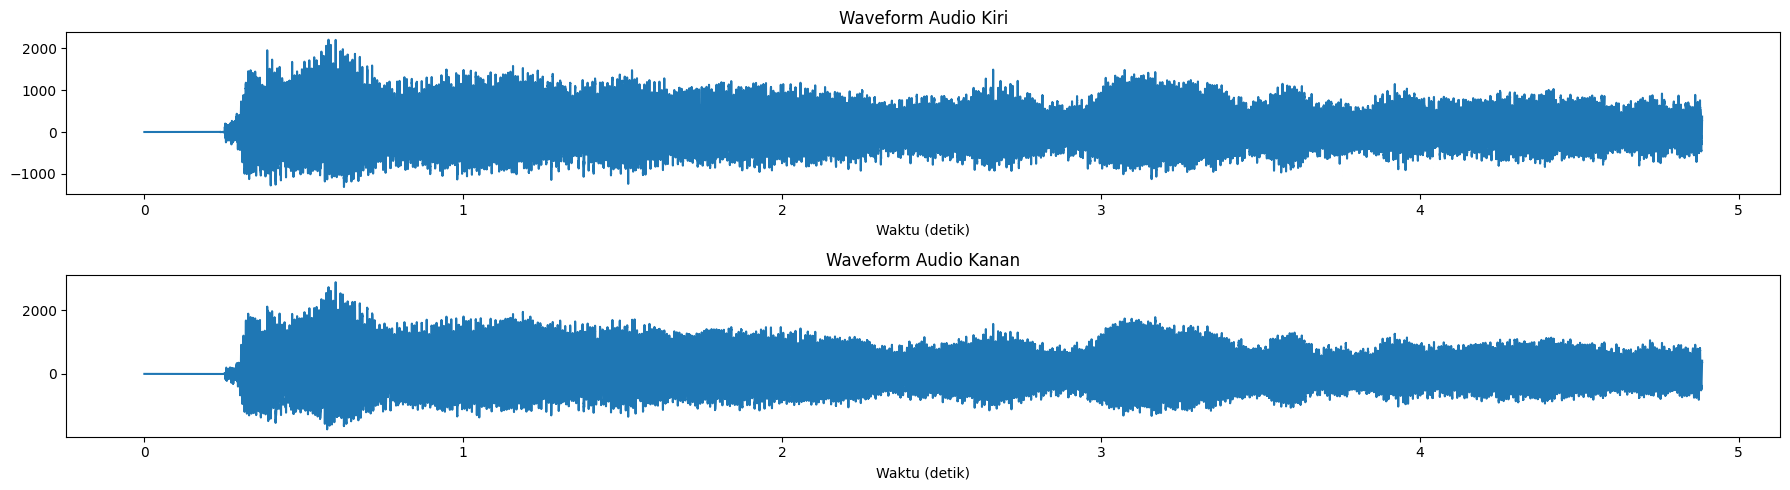

In [11]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(time_axis, data_audio_kiri, label='Kiri')
fig[0].set_title('Waveform Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[1].plot(time_axis, data_audio_kanan, label='Kanan')
fig[1].set_title('Waveform Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
plt.tight_layout()
plt.show()